# 1. DATA PREPROCESSING
 IMPORTING LIBRARIES

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


 Data Loading

In [3]:
df = pd.read_csv("R:/IIT_MADRAS_DATA_SCINCE/DataSet/Healthcare Reviews/healthcare_reviews.csv")

In [4]:
df.loc[df['Rating'] > 3, 'Sentiment'] = '1'
df.loc[df['Rating'] == 3, 'Sentiment'] = '0'
df.loc[df['Rating'] < 3, 'Sentiment'] = '-1'

In [6]:
df.head()

,Review_Text,Rating,Sentiment
0,I have mixed feelings about my experience.,4,1
1,The staff was caring and attentive. I couldn't...,5,1
2,I have mixed feelings about my experience.,5,1
3,I have mixed feelings about my experience.,5,1
4,The healthcare provider was excellent. I had a...,3,0


  Handling Missing Data

In [7]:
df.isnull().sum()

Review_Text    100
Rating           0
Sentiment        0
dtype: int64

In [8]:
df.shape                                                                                

(1000, 3)

In [9]:
df = df.dropna()
df.shape

(900, 3)

 Lowercasing


In [10]:
df['Review_Text'] = df['Review_Text'].str.lower()

In [58]:
df

,Review_Text,Rating,Sentiment
0,i have mixed feelings about my experience.,4,1
1,the staff was caring and attentive. i couldn't...,5,1
2,i have mixed feelings about my experience.,5,1
3,i have mixed feelings about my experience.,5,1
4,the healthcare provider was excellent. i had a...,3,0
...,...,...,...
995,my experience was terrible. i would not recomm...,5,1
996,the service was disappointing. i won't be comi...,4,1
997,"the service was okay, but nothing exceptional.",3,0
998,i have mixed feelings about my experience.,5,1


Removing Special Characters

In [11]:
import re
df['cleaned_text'] = df['Review_Text'].apply(lambda x: re.sub(r'[^\w\s]','',x))


In [12]:
df

,Review_Text,Rating,Sentiment,cleaned_text
0,i have mixed feelings about my experience.,4,1,i have mixed feelings about my experience
1,the staff was caring and attentive. i couldn't...,5,1,the staff was caring and attentive i couldnt b...
2,i have mixed feelings about my experience.,5,1,i have mixed feelings about my experience
3,i have mixed feelings about my experience.,5,1,i have mixed feelings about my experience
4,the healthcare provider was excellent. i had a...,3,0,the healthcare provider was excellent i had a ...
...,...,...,...,...
995,my experience was terrible. i would not recomm...,5,1,my experience was terrible i would not recomme...
996,the service was disappointing. i won't be comi...,4,1,the service was disappointing i wont be coming...
997,"the service was okay, but nothing exceptional.",3,0,the service was okay but nothing exceptional
998,i have mixed feelings about my experience.,5,1,i have mixed feelings about my experience


 Tokenization

In [13]:
df['tokenized_reviews'] = df.apply(lambda row: nltk.word_tokenize(row['Review_Text']), axis=1)

In [ ]:
df

 Removing Stopwords

In [15]:
stop_words = set(stopwords.words('english'))

df['stopwords_reviews'] = df['tokenized_reviews'].apply(lambda x: [word for word in x if word not in stop_words])

In [16]:
df

,Review_Text,Rating,Sentiment,cleaned_text,tokenized_reviews,stopwords_reviews
0,i have mixed feelings about my experience.,4,1,i have mixed feelings about my experience,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]"
1,the staff was caring and attentive. i couldn't...,5,1,the staff was caring and attentive i couldnt b...,"[the, staff, was, caring, and, attentive, ., i...","[staff, caring, attentive, ., could, n't, happ..."
2,i have mixed feelings about my experience.,5,1,i have mixed feelings about my experience,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]"
3,i have mixed feelings about my experience.,5,1,i have mixed feelings about my experience,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]"
4,the healthcare provider was excellent. i had a...,3,0,the healthcare provider was excellent i had a ...,"[the, healthcare, provider, was, excellent, .,...","[healthcare, provider, excellent, ., great, ex..."
...,...,...,...,...,...,...
995,my experience was terrible. i would not recomm...,5,1,my experience was terrible i would not recomme...,"[my, experience, was, terrible, ., i, would, n...","[experience, terrible, ., would, recommend, pr..."
996,the service was disappointing. i won't be comi...,4,1,the service was disappointing i wont be coming...,"[the, service, was, disappointing, ., i, wo, n...","[service, disappointing, ., wo, n't, coming, b..."
997,"the service was okay, but nothing exceptional.",3,0,the service was okay but nothing exceptional,"[the, service, was, okay, ,, but, nothing, exc...","[service, okay, ,, nothing, exceptional, .]"
998,i have mixed feelings about my experience.,5,1,i have mixed feelings about my experience,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]"


 Lemmatization 

In [17]:
lemmatizer = WordNetLemmatizer()

df['lemmatized'] = df['stopwords_reviews'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [19]:
df.head()


,Review_Text,Rating,Sentiment,cleaned_text,tokenized_reviews,stopwords_reviews,lemmatized
0,i have mixed feelings about my experience.,4,1,i have mixed feelings about my experience,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feeling, experience, .]"
1,the staff was caring and attentive. i couldn't...,5,1,the staff was caring and attentive i couldnt b...,"[the, staff, was, caring, and, attentive, ., i...","[staff, caring, attentive, ., could, n't, happ...","[staff, caring, attentive, ., could, n't, happ..."
2,i have mixed feelings about my experience.,5,1,i have mixed feelings about my experience,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feeling, experience, .]"
3,i have mixed feelings about my experience.,5,1,i have mixed feelings about my experience,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feeling, experience, .]"
4,the healthcare provider was excellent. i had a...,3,0,the healthcare provider was excellent i had a ...,"[the, healthcare, provider, was, excellent, .,...","[healthcare, provider, excellent, ., great, ex...","[healthcare, provider, excellent, ., great, ex..."


 Rejoin Processed Tokens

In [41]:
# Convert list to string - lemmatized column
def convert_to_string(words_list):
    return " ".join(words_list)

In [42]:
df['processed_text'] = df.apply(lambda row:convert_to_string(row['lemmatized']),axis=1)

In [43]:
df

,Review_Text,Rating,Sentiment,cleaned_text,tokenized_reviews,stopwords_reviews,lemmatized,processed_text
0,i have mixed feelings about my experience.,4,1,i have mixed feelings about my experience,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feeling, experience, .]",mixed feeling experience .
1,the staff was caring and attentive. i couldn't...,5,1,the staff was caring and attentive i couldnt b...,"[the, staff, was, caring, and, attentive, ., i...","[staff, caring, attentive, ., could, n't, happ...","[staff, caring, attentive, ., could, n't, happ...",staff caring attentive . could n't happier .
2,i have mixed feelings about my experience.,5,1,i have mixed feelings about my experience,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feeling, experience, .]",mixed feeling experience .
3,i have mixed feelings about my experience.,5,1,i have mixed feelings about my experience,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feeling, experience, .]",mixed feeling experience .
4,the healthcare provider was excellent. i had a...,3,0,the healthcare provider was excellent i had a ...,"[the, healthcare, provider, was, excellent, .,...","[healthcare, provider, excellent, ., great, ex...","[healthcare, provider, excellent, ., great, ex...",healthcare provider excellent . great experien...
...,...,...,...,...,...,...,...,...
995,my experience was terrible. i would not recomm...,5,1,my experience was terrible i would not recomme...,"[my, experience, was, terrible, ., i, would, n...","[experience, terrible, ., would, recommend, pr...","[experience, terrible, ., would, recommend, pr...",experience terrible . would recommend provider .
996,the service was disappointing. i won't be comi...,4,1,the service was disappointing i wont be coming...,"[the, service, was, disappointing, ., i, wo, n...","[service, disappointing, ., wo, n't, coming, b...","[service, disappointing, ., wo, n't, coming, b...",service disappointing . wo n't coming back .
997,"the service was okay, but nothing exceptional.",3,0,the service was okay but nothing exceptional,"[the, service, was, okay, ,, but, nothing, exc...","[service, okay, ,, nothing, exceptional, .]","[service, okay, ,, nothing, exceptional, .]","service okay , nothing exceptional ."
998,i have mixed feelings about my experience.,5,1,i have mixed feelings about my experience,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feeling, experience, .]",mixed feeling experience .


  Encoding Labels

In [70]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# df['sentiment_lable'] = le.fit_transform(df['Sentiment'])

In [71]:
# df.tail()

In [44]:
df.to_csv(r"R:\IIT_MADRAS_DATA_SCINCE\DataSet\Healthcare Reviews\Cleaned_Dataset.csv" , index= False)

In [45]:
df['Sentiment'].value_counts()

Sentiment
1     388
-1    365
0     147
Name: count, dtype: int64

 Splitting Data

In [46]:
df.head()

,Review_Text,Rating,Sentiment,cleaned_text,tokenized_reviews,stopwords_reviews,lemmatized,processed_text
0,i have mixed feelings about my experience.,4,1,i have mixed feelings about my experience,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feeling, experience, .]",mixed feeling experience .
1,the staff was caring and attentive. i couldn't...,5,1,the staff was caring and attentive i couldnt b...,"[the, staff, was, caring, and, attentive, ., i...","[staff, caring, attentive, ., could, n't, happ...","[staff, caring, attentive, ., could, n't, happ...",staff caring attentive . could n't happier .
2,i have mixed feelings about my experience.,5,1,i have mixed feelings about my experience,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feeling, experience, .]",mixed feeling experience .
3,i have mixed feelings about my experience.,5,1,i have mixed feelings about my experience,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feeling, experience, .]",mixed feeling experience .
4,the healthcare provider was excellent. i had a...,3,0,the healthcare provider was excellent i had a ...,"[the, healthcare, provider, was, excellent, .,...","[healthcare, provider, excellent, ., great, ex...","[healthcare, provider, excellent, ., great, ex...",healthcare provider excellent . great experien...


In [47]:
from sklearn.model_selection import train_test_split

X = df['processed_text'].values # Features: the cleaned reviews
y = df['Sentiment'].values # Lables: sentiment scores

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

In [48]:
print('X_train= ' + str(len(y_train)))
print('X_test= ' + str(len(X_test)))

X_train= 675
X_test= 225


In [49]:
print('y_train = ' + str(len(y_train)))
print('y_test = ' + str(len(y_test)))

y_train = 675
y_test = 225


# 2. Sentiment Analysis Model
Feature Extraction (Vectorization)


In [50]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))
X_train_vactorizer = vectorizer.fit_transform(X_train)
X_test_vectorizer = vectorizer.fit_transform(X_test)

In [51]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [52]:
print("y_train, counts of label '1' : {}".format(np.count_nonzero(y_train == 1)))
print("y_train, count of label '-1' : {}".format(np.count_nonzero(y_train == -1)))
print("y_train, count of label '0' : {}".format(np.count_nonzero(y_train == 0)))

y_train, counts of label '1' : 290
y_train, count of label '-1' : 269
y_train, count of label '0' : 116


In [53]:
print("y_test, count of label '1' : {}".format(np.count_nonzero(y_test == 1)))
print("y_test,count of label '-1' : {}".format(np.count_nonzero(y_test == -1)))
print("y_test count of label '0' : {}".format(np.count_nonzero(y_test == 0)))

y_test, count of label '1' : 98
y_test,count of label '-1' : 96
y_test count of label '0' : 31


# Word Embeddings (Optional)
More advanced models like Word2Vec or BERT use word embeddings to capture semantic meaning. I can train embeddings or use pre-trained ones for better results.

In [81]:
# # Example with Word2Vec (requires more setup and time)

# from gensim.models import Word2Vec

# model = Word2Vec(df['lemmatized'], vector_size=100, window=5, min_count=1, workers=4)


In [82]:
# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer(ngram_range=(1,2))

# X_train_cv = cv.fit_transform(X_train)
# X_test_cv = cv.fit_transform(X_test)

In [83]:
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)



After preprocessing and vectorizing the data, 
I can use various machine learning models, such as Logistic Regression, Naive Bayes
for sentiment classification.

# Logistic Regression

In [84]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report

# model = LogisticRegression()
# model.fit(X_train_cv, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test_cv)



In [85]:
# cm = confusion_matrix(y_test,y_pred)
# print(cm)
# print(accuracy_score(y_test,y_pred))

In [86]:
# categories = ["1","0","-1"]
# sns.heatmap(cm,annot=True,xticklabels=categories,yticklabels=categories)

In [87]:
# #Evaluate model
# print(classification_report(y_test,y_pred))

# Naive Bayes

In [88]:
# from sklearn.naive_bayes import MultinomialNB

# nb_model = MultinomialNB()
# nb_model.fit(X_train_cv, y_train)

# # Predict on the test set
# y_pred = nb_model.predict(X_test_cv)

In [89]:
# cm = confusion_matrix(y_test,y_pred)
# print(cm)
# print(cm,accuracy_score(y_test,y_pred))

In [90]:
# categories = ["1","0","-1"]
# sns.heatmap(cm, annot=True,xticklabels=categories,yticklabels=categories)

# Evaluating the Model
Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.

In [91]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred, zero_division=1))

In [92]:
# df.shape

KNN Classifier

In [54]:
# Choosing the value of K

K = []
training = []
test = []
scores = {}

for k in range(2,21):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_vactorizer,y_train)

    training_score = clf.score(X_train_vactorizer,y_train)
    test_score = clf.score(X_test_vectorizer , y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]


In [36]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.39555555555555555, 0.44]
3 : [0.38222222222222224, 0.4222222222222222]
4 : [0.35555555555555557, 0.38666666666666666]
5 : [0.3688888888888889, 0.3688888888888889]
6 : [0.42074074074074075, 0.37333333333333335]
7 : [0.4059259259259259, 0.37333333333333335]
8 : [0.45925925925925926, 0.4222222222222222]
9 : [0.45925925925925926, 0.4222222222222222]
10 : [0.44296296296296295, 0.40444444444444444]
11 : [0.45925925925925926, 0.4222222222222222]
12 : [0.4488888888888889, 0.4]
13 : [0.45925925925925926, 0.4222222222222222]
14 : [0.45925925925925926, 0.4222222222222222]
15 : [0.44592592592592595, 0.44]
16 : [0.44592592592592595, 0.44]
17 : [0.44592592592592595, 0.44]
18 : [0.44592592592592595, 0.44]
19 : [0.44296296296296295, 0.4266666666666667]
20 : [0.44592592592592595, 0.44]


In [55]:
# Optimal k value is 11
knnclf = KNeighborsClassifier(n_neighbors=11)
knnclf.fit(X_train_vactorizer,y_train)

KNeighborsClassifier(n_neighbors=11)

In [56]:
y_pred = knnclf.predict(X_test_vectorizer)

In [57]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[42  0 54]
 [ 8  0 23]
 [45  0 53]]
0.4222222222222222


<Axes: >

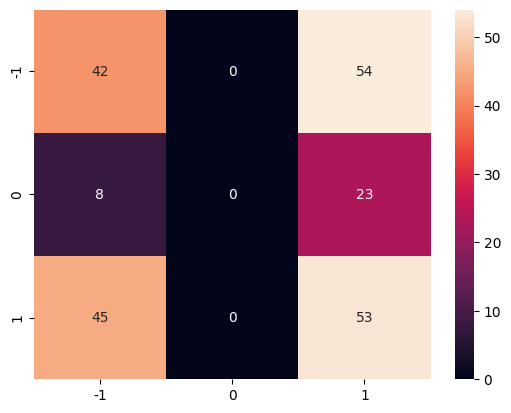

In [58]:
categories = ["-1","0","1"]
sns.heatmap(cm, annot=True, xticklabels=categories,yticklabels=categories)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.44      0.44      0.44        96
           0       0.00      0.00      0.00        31
           1       0.41      0.54      0.46        98

    accuracy                           0.42       225
   macro avg       0.28      0.33      0.30       225
weighted avg       0.37      0.42      0.39       225



c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# KNN Classifier with Oversampling od 0:

In [64]:
print("Before OverSampling, counts of label '1' : {}".format(np.count_nonzero(y_train=='1')))
print("Before OverSampling, count o9f label '-1' : {}".format(np.count_nonzero(y_train=='-1')))
print("Before OverSampling, count o9f label '-1' : {}".format(np.count_nonzero(y_train=='0')))
print("Before OverSampling : 675")
oversample = RandomOverSampler(sampling_strategy = 'minority')
X_train_over,y_train_over = oversample.fit_resample(X_train_vactorizer,y_train)

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {}\n".format(y_train_over.shape))

print("After OverSampling, counts of label '1' : {}".format(np.count_nonzero(y_train_over=='1')))
print("After OverSampling, counts of label '-1' : {}".format(np.count_nonzero(y_train_over=='-1')))
print("After OverSampling, counts of label '0' : {}".format(np.count_nonzero(y_train_over=='0')))
print("After OverSampling: 849")

Before OverSampling, counts of label '1' : 0
Before OverSampling, count o9f label '-1' : 0
Before OverSampling, count o9f label '-1' : 0
Before OverSampling : 675
After OverSampling, the shape of train_X: (849, 66)
After OverSampling, the shape of train_y: (849,)

After OverSampling, counts of label '1' : 0
After OverSampling, counts of label '-1' : 0
After OverSampling, counts of label '0' : 0
After OverSampling: 849


In [65]:
knnclf_over = KNeighborsClassifier(n_neighbors= 11)
knnclf_over.fit(X_train_over,y_train_over)

KNeighborsClassifier(n_neighbors=11)

In [68]:
y_pred =knnclf_over.predict(X_test_vectorizer)

In [69]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[11 66 19]
 [ 9 16  6]
 [10 60 28]]
0.24444444444444444


<Axes: >

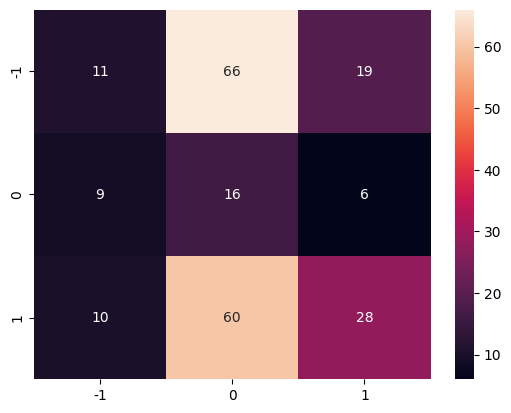

In [70]:
categories = ["-1","0","1"]
sns.heatmap(cm,annot=True, xticklabels=categories,yticklabels=categories)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.37      0.11      0.17        96
           0       0.11      0.52      0.18        31
           1       0.53      0.29      0.37        98

    accuracy                           0.24       225
   macro avg       0.34      0.31      0.24       225
weighted avg       0.40      0.24      0.26       225



# Logistic Regression:

In [72]:
log_reg_clf = LogisticRegression()
log_reg_clf.fit(X_train_vactorizer,y_train)

LogisticRegression()

In [74]:
y_pred = log_reg_clf.predict(X_test_vectorizer)

In [75]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[42  0 54]
 [ 8  0 23]
 [45  0 53]]
0.4222222222222222


<Axes: >

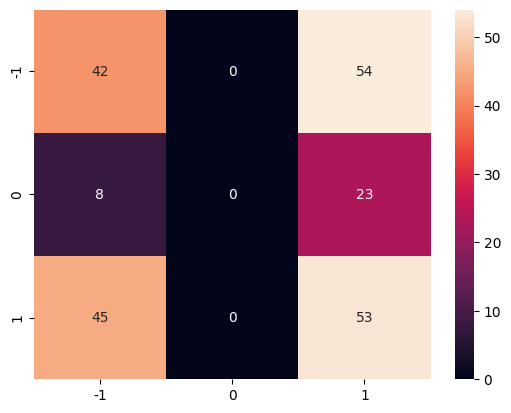

In [76]:
categories = ["-1","0","1"]
sns.heatmap(cm, annot=True,xticklabels=categories,yticklabels=categories)

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.44      0.44      0.44        96
           0       0.00      0.00      0.00        31
           1       0.41      0.54      0.46        98

    accuracy                           0.42       225
   macro avg       0.28      0.33      0.30       225
weighted avg       0.37      0.42      0.39       225



c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Random Forest Classifier:

In [78]:
random_forest_classifier = RandomForestClassifier(n_estimators=100)
random_forest_classifier.fit(X_train_vactorizer,y_train)

RandomForestClassifier()

In [79]:
y_pred = random_forest_classifier.predict(X_test_vectorizer)

In [81]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[42  0 54]
 [ 8  0 23]
 [45  0 53]]
0.4222222222222222


<Axes: >

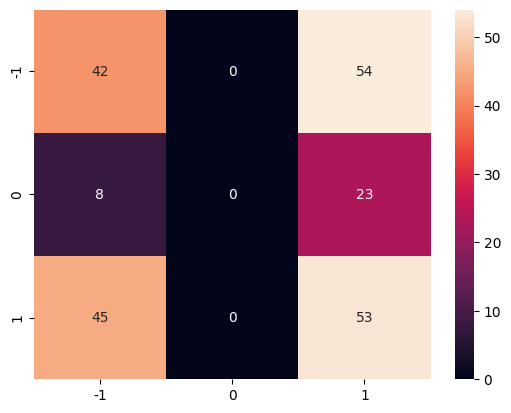

In [82]:
categories = ["-1","0","1"]
sns.heatmap(cm,annot=True,xticklabels=categories,yticklabels=categories)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.44      0.44      0.44        96
           0       0.00      0.00      0.00        31
           1       0.41      0.54      0.46        98

    accuracy                           0.42       225
   macro avg       0.28      0.33      0.30       225
weighted avg       0.37      0.42      0.39       225



c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Analyzing the test data:

In [84]:
analysis_df = pd.DataFrame(X_test_vectorizer.toarray(), columns =vectorizer.get_feature_names_out())
analysis_df['y_test']=y_test
analysis_df['y_pred']=y_pred
analysis_df.to_csv(r"R:\IIT_MADRAS_DATA_SCINCE\DataSet\Healthcare Reviews\analysis.csv",index=False)

# Reason for loweval metric value:

Insufficient number of data for training (675) and testing (225) data imbalance for neutral reviews(Sentiment-0) Training dataset is not clear. Eg: Review "i have mixed feeling about my exprience".has been categorized in all 3 sentiments(+ve,-ve and neutral)

# EDA:

In [85]:
sentiment_counts = df['Sentiment'].value_counts()

In [86]:
sentiment_counts

Sentiment
1     388
-1    365
0     147
Name: count, dtype: int64

In [88]:
fig = px.bar(sentiment_counts,height=400,width=700)
fig.update_layout(showlegend = False)
fig.show()

In [90]:
vectorizer = CountVectorizer(ngram_range=(1,2))

X_vectorizer = vectorizer.fit_transform(X)

In [91]:
dataset_analysis = pd.DataFrame(X_vectorizer.toarray(), columns=vectorizer.get_feature_names_out())
dataset_analysis['Sentiment']=y

In [92]:
dataset_analysis.to_csv(r"R:\IIT_MADRAS_DATA_SCINCE\DataSet\Healthcare Reviews\data",index=False)

In [93]:
dataset_analysis.shape

(900, 67)

In [94]:
temp_df = dataset_analysis.query("Sentiment=='1'")

In [95]:
positive_df = pd.DataFrame()
positive_df['Words']=list(temp_df.iloc[:, :-1].columns)
positive_df['Frequency'] = temp_df.iloc[:,:-1].sum().values
positive_df = positive_df.sort_values(by='Frequency',ascending=False)
positive_df.to_csv(r'positive_df_1.csv',index=False)

In [96]:
positive_df.head()

,Words,Frequency
20,experience,209
54,service,136
44,provider,127
32,healthcare provider,86
31,healthcare,86


In [97]:
positive_df[positive_df['Words'].str.split().apply(len) > 1]

,Words,Frequency
32,healthcare provider,86
12,coming back,50
16,disappointing wo,50
55,service disappointing,50
63,wo coming,50
29,great experience,48
18,excellent great,48
46,provider excellent,48
57,service received,46
48,received highly,46


In [98]:
temp_df = dataset_analysis.query("Sentiment=='-1'")

In [101]:
negative_df = pd.DataFrame()
negative_df['Words'] = list(temp_df.iloc[:, :-1].columns)
negative_df['Frequency'] = temp_df.iloc[:, :-1].sum().values
negative_df = negative_df.sort_values(by='Frequency',ascending=False)
negative_df.to_csv(r'negative_df_1.csv',index=False)

In [102]:
negative_df.head()

,Words,Frequency
20,experience,186
54,service,131
44,provider,109
7,bad,80
31,healthcare,73


In [103]:
negative_df[negative_df['Words'].str.split().apply(len) > 1]

,Words,Frequency
32,healthcare provider,73
48,received highly,54
34,highly recommended,54
53,satisfied service,54
57,service received,54
1,attentive could,48
59,staff caring,48
10,caring attentive,48
14,could happier,48
27,good bad,43


In [104]:
temp_df = dataset_analysis.query("Sentiment == '0'")

In [105]:
neutral_df = pd.DataFrame()
neutral_df['Words'] = list(temp_df.iloc[:,:-1].columns)
neutral_df['Frequency'] = temp_df.iloc[:,:-1].sum().values
neutral_df = negative_df.sort_values(by='Frequency',ascending=False)
neutral_df.to_csv(r'netural_df_1.csv',index=False)

In [106]:
neutral_df.head()

,Words,Frequency
20,experience,186
54,service,131
44,provider,109
7,bad,80
31,healthcare,73


In [107]:
neutral_df[neutral_df['Words'].str.split().apply(len) > 1]

,Words,Frequency
32,healthcare provider,73
48,received highly,54
34,highly recommended,54
53,satisfied service,54
57,service received,54
14,could happier,48
10,caring attentive,48
59,staff caring,48
1,attentive could,48
27,good bad,43
